In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
#from mycolorpy import colorlist as mcp
import networkx as nx
import glob 

import sys
sys.path.append('../../')
from utils import *
from topological_metrics import get_weighted_graph

In [2]:
#dataset = "pr_school";gap = 300;state_gap = 1200;nb_states_L = 3;nb_states_e = 8
#dataset = "h_school11";gap = 1200;state_gap = 1200;nb_states_L = 3;nb_states_e = 7
dataset = "h_school13";gap = 1200;state_gap = 1200;nb_states_L = 4;nb_states_e = 29
#dataset = "InVS15"; gap = 3600; state_gap = 3600; nb_states_L = 3;nb_states_e = 12
#dataset = "hypertext";gap = 1200;state_gap = 1200;nb_states_L = 3;nb_states_e = 20

In [3]:
if dataset == 'pr_school':
    nb_nodes = 242
elif dataset == 'h_school11':
    nb_nodes = 126
elif dataset == 'h_school13':
    nb_nodes = 327
elif dataset == 'InVS15':
    nb_nodes = 217
elif dataset == 'hypertext':
    nb_nodes = 113

# Functions

In [4]:
def obtain_x_final(dataset,net,q,net_idx):
    if net == 'D':
        filename = "results/xf_%s_%s_q_%.2f.csv"%(dataset,net,q)
    else:
        filename = "results/xf_%s_%s_q_%.2f_%d.csv"%(dataset,net,q,net_idx)
    with open(filename, 'r') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',')
        x = []
        for row in spamreader:
             x.append([float(i) for i in row])
    return x

In [5]:
'''
path_gen = '../../Generated_graphs/d2/'

def obtain_filename(dataset,path_gen,gap,nb_etn_states,nb_Lapl_states,net,net_idx):
    if net == 'D':
        filename = '../../Datasets/' + dataset + '.dat'
    elif net =='E':
        directory = path_gen + dataset + '_gap_%d_%d_etn_states'%(gap,nb_etn_states)
        filename = directory + '/%d.dat'%net_idx
    elif net =='ES':
        directory = path_gen + dataset + '_gap_%d_%d_etn_states_%d_Lapl_states_mu_pcl_1'%(gap,nb_etn_states,nb_Lapl_states)
        filename = directory + '/%d.dat'%net_idx
    elif net =='EST':
        #directory = path_gen + dataset + '_gap_%d_%d_etn_states_%d_Lapl_states_mu_pcl_1_memory_homo'%(gap,nb_etn_states,nb_Lapl_states)
        directory = path_gen + dataset + '_gap_%d_%d_etn_states_%d_Lapl_states_mu_pcl_1_memory_hetero'%(gap,nb_etn_states,nb_Lapl_states)
        filename = directory + '/%d.dat'%net_idx
    return filename
    '''

"\npath_gen = '../../Generated_graphs/d2/'\n\ndef obtain_filename(dataset,path_gen,gap,nb_etn_states,nb_Lapl_states,net,net_idx):\n    if net == 'D':\n        filename = '../../Datasets/' + dataset + '.dat'\n    elif net =='E':\n        directory = path_gen + dataset + '_gap_%d_%d_etn_states'%(gap,nb_etn_states)\n        filename = directory + '/%d.dat'%net_idx\n    elif net =='ES':\n        directory = path_gen + dataset + '_gap_%d_%d_etn_states_%d_Lapl_states_mu_pcl_1'%(gap,nb_etn_states,nb_Lapl_states)\n        filename = directory + '/%d.dat'%net_idx\n    elif net =='EST':\n        #directory = path_gen + dataset + '_gap_%d_%d_etn_states_%d_Lapl_states_mu_pcl_1_memory_homo'%(gap,nb_etn_states,nb_Lapl_states)\n        directory = path_gen + dataset + '_gap_%d_%d_etn_states_%d_Lapl_states_mu_pcl_1_memory_hetero'%(gap,nb_etn_states,nb_Lapl_states)\n        filename = directory + '/%d.dat'%net_idx\n    return filename\n    "

# Upload results and find opinion groups

In [6]:
q_range = np.linspace(0.1,0.55,num=10)
q_range

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55])

### D

In [7]:
net = 'D'

Load network and aggregate:

In [8]:
edgelist_D = pd.read_csv("../../Datasets/"+dataset+".dat",sep=" ",names=["t","i","j"])
graph_D = build_graphs(edgelist_D,gap)
Gw = get_weighted_graph(graph_D)

Load opinions and create a network by adding the edges of the aggregated network only if the two nodes opinions differ less than $q$

In [9]:
for q in q_range:
    globals()['nb_groups_q%d'%(q*100)] = []
    x_list = obtain_x_final(dataset,net,q,net_idx=False) # load x
    print('nb simulations',len(x_list))
    for x in x_list:
        Gwx = nx.Graph()
        for edge in Gw.edges():
            if np.abs(x[edge[0]] - x[edge[1]]) < q:
                Gwx.add_edges_from([(edge[0], edge[1])])
        globals()['nb_groups_q%d'%(q*100)].append(nx.number_connected_components(Gwx)) # find conn comp

nb simulations 200
nb simulations 200
nb simulations 200
nb simulations 200
nb simulations 200
nb simulations 200
nb simulations 200
nb simulations 200
nb simulations 200
nb simulations 200


Mean and std of nb groups over the 100 simulations

In [10]:
nbg_mean = []
nbg_std = []
for q in q_range:
    nb_groups_list = globals()['nb_groups_q%d'%(q*100)]
    nbg_mean.append(np.mean(nb_groups_list))
    nbg_std.append(np.std(nb_groups_list))
globals()['nbg_mean_%s'%net] = np.array(nbg_mean)
globals()['nbg_std_%s'%net] = np.array(nbg_std)

### EST

In [11]:
d = 2
path = "../../Generated_graphs/d%d/"%d

In [12]:
net = 'EST'

In [13]:
directory = path+"%s_EST_gap_%d_%d_states_e_%d_states_L/"%(dataset,gap,nb_states_e,nb_states_L)
nb_surr = len(glob.glob1(directory,"*.dat"))
print('nb_surr',nb_surr)

nb_surr 10


In [14]:
for q in q_range:
    globals()['nb_groups_q%d'%(q*100)] = []
    
for net_idx in range(nb_surr): # load network and aggregate
    data_in = pd.read_csv(directory+"/%d.dat"%net_idx,sep=" ",names=["t","i","j"])
    G = build_graphs(data_in,gap)
    Gw = get_weighted_graph(G)
    
    # create a network by adding the edges of Gw only if the two nodes opinions differ less than q
    for q in q_range:
        x_list = obtain_x_final(dataset,net,q,net_idx) # load x
        for x in x_list:
            Gwx = nx.Graph()
            for edge in Gw.edges():
                if np.abs(x[edge[0]] - x[edge[1]]) < q:
                    Gwx.add_edges_from([(edge[0], edge[1])])
            globals()['nb_groups_q%d'%(q*100)].append(nx.number_connected_components(Gwx))# find conn comp

Mean and std of nb groups over net_idx and the 10 simulations:

In [15]:
nbg_mean = []
nbg_std = []
for q in q_range:
    nb_groups_list = globals()['nb_groups_q%d'%(q*100)]
    nbg_mean.append(np.mean(nb_groups_list))
    nbg_std.append(np.std(nb_groups_list))
globals()['nbg_mean_%s'%net] = np.array(nbg_mean)
globals()['nbg_std_%s'%net] = np.array(nbg_std)

### ES

In [16]:
net = 'ES'

In [17]:
directory = path+"%s_ES_gap_%d_%d_states_e_%d_states_L/"%(dataset,gap,nb_states_e,nb_states_L)
nb_surr = len(glob.glob1(directory,"*.dat"))
print('nb_surr',nb_surr)

nb_surr 10


In [18]:
for q in q_range:
    globals()['nb_groups_q%d'%(q*100)] = []
    
for net_idx in range(nb_surr): # load network and aggregate
    data_in = pd.read_csv(directory+"/%d.dat"%net_idx,sep=" ",names=["t","i","j"])
    G = build_graphs(data_in,gap)
    Gw = get_weighted_graph(G)
    
    # create a network by adding the edges of Gw only if the two nodes opinions differ less than q
    for q in q_range:
        x_list = obtain_x_final(dataset,net,q,net_idx) # load x
        for x in x_list:
            Gwx = nx.Graph()
            for edge in Gw.edges():
                if np.abs(x[edge[0]] - x[edge[1]]) < q:
                    Gwx.add_edges_from([(edge[0], edge[1])])
            globals()['nb_groups_q%d'%(q*100)].append(nx.number_connected_components(Gwx))# find conn comp

Mean and std of nb groups over net_idx and the 10 simulations:

In [19]:
nbg_mean = []
nbg_std = []
for q in q_range:
    nb_groups_list = globals()['nb_groups_q%d'%(q*100)]
    nbg_mean.append(np.mean(nb_groups_list))
    nbg_std.append(np.std(nb_groups_list))
globals()['nbg_mean_%s'%net] = np.array(nbg_mean)
globals()['nbg_std_%s'%net] = np.array(nbg_std)

### E

In [20]:
net = 'E'

In [21]:
directory = path+"%s_E_gap_%d_%d_states_e/"%(dataset,gap,nb_states_e)
nb_surr = len(glob.glob1(directory,"*.dat"))
print('nb_surr',nb_surr)

nb_surr 10


In [22]:
for q in q_range:
    globals()['nb_groups_q%d'%(q*100)] = []
    
for net_idx in range(nb_surr): # load network and aggregate
    data_in = pd.read_csv(directory+"/%d.dat"%net_idx,sep=" ",names=["t","i","j"])
    G = build_graphs(data_in,gap)
    Gw = get_weighted_graph(G)
    
    # create a network by adding the edges of Gw only if the two nodes opinions differ less than q
    for q in q_range:
        x_list = obtain_x_final(dataset,net,q,net_idx) # load x
        for x in x_list:
            Gwx = nx.Graph()
            for edge in Gw.edges():
                if np.abs(x[edge[0]] - x[edge[1]]) < q:
                    Gwx.add_edges_from([(edge[0], edge[1])])
            globals()['nb_groups_q%d'%(q*100)].append(nx.number_connected_components(Gwx))# find conn comp

Mean and std of nb groups over net_idx and the 10 simulations:

In [23]:
nbg_mean = []
nbg_std = []
for q in q_range:
    nb_groups_list = globals()['nb_groups_q%d'%(q*100)]
    nbg_mean.append(np.mean(nb_groups_list))
    nbg_std.append(np.std(nb_groups_list))
globals()['nbg_mean_%s'%net] = np.array(nbg_mean)
globals()['nbg_std_%s'%net] = np.array(nbg_std)

# Plot

In [24]:
D_color = "#656565"# '#545454'
E_color = '#ffcc5c'#'#9bc995'#"#F3AA20" 
ES_color = '#88d8b0'#'#0f4c5c'#"seagreen"  
EST_color = '#ff6f69'#'#fb8b24'# "violet" 

In [25]:
plt.rcParams.update({'font.size': 18})

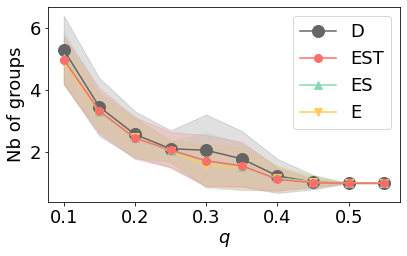

In [26]:
plt.figure(figsize=(6,3.9))

plt.plot(q_range,nbg_mean_D,'o-',c=D_color,label="D",markersize = 12)
plt.fill_between(q_range,nbg_mean_D+nbg_std_D,nbg_mean_D-nbg_std_D,color=D_color,alpha=0.2)

plt.plot(q_range,nbg_mean_E,'v-',c=E_color,label="E",markersize = 8)
plt.fill_between(q_range,nbg_mean_E+nbg_std_E,nbg_mean_E-nbg_std_E,color=E_color,alpha=0.2)

plt.plot(q_range,nbg_mean_ES,'^-',c=ES_color,label="ES",markersize = 8)
plt.fill_between(q_range,nbg_mean_ES+nbg_std_ES,nbg_mean_ES-nbg_std_ES,color=ES_color,alpha=0.2)

plt.plot(q_range,nbg_mean_EST,'o-',c=EST_color,label="EST",markersize = 8)
plt.fill_between(q_range,nbg_mean_EST+nbg_std_EST,nbg_mean_EST-nbg_std_EST,color=EST_color,alpha=0.2)

plt.xlabel('$q$')
plt.ylabel('Nb of groups')
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,3,2,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
plt.tight_layout()

if not os.path.exists('figs/'):
    os.makedirs('figs/')
plt.savefig('figs/nb_groups_%s.pdf'%(dataset))
plt.show()

# Plot conv time:

In [27]:
def load_n_size_list(filename):
    T_list_ = []
    file=open(filename, 'r')
    content =file.read().splitlines()
    for time in content:
        T_list_.append(int(time))
    file.close()
    
    T_list_ = T_list_
    return T_list_

In [28]:
for net in ['D','EST','ES','E']:
    print(net)
    T_mean = []
    T_std = []
    for q in q_range:
        filename = "results/t_conv_%s_%s_q_%.2f.txt"%(dataset,net,q)
        T_list = load_n_size_list(filename)

        T_mean.append(np.mean(T_list))
        T_std.append(np.std(T_list))
    T_mean = np.array(T_mean)
    T_std = np.array(T_std)
    globals()['T_mean_%s'%net] = T_mean
    globals()['T_std_%s'%net] = T_std


D
EST
ES
E


In [29]:
T_mean_D = T_mean_D*gap/3600
T_std_D = T_std_D*gap/3600
T_mean_E = T_mean_E*gap/3600
T_std_E = T_std_E*gap/3600
T_mean_ES = T_mean_ES*gap/3600
T_std_ES = T_std_ES*gap/3600
T_mean_EST = T_mean_EST*gap/3600
T_std_EST = T_std_EST*gap/3600

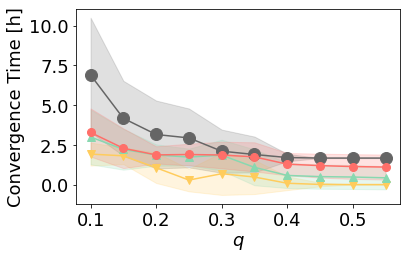

In [30]:
plt.figure(figsize=(6,3.9))

plt.plot(q_range,T_mean_D,'o-',c=D_color,label="D",markersize = 12)
plt.fill_between(q_range,T_mean_D+T_std_D,T_mean_D-T_std_D,color=D_color,alpha=0.2)

plt.plot(q_range,T_mean_E,'v-',c=E_color,label="E",markersize = 8)
plt.fill_between(q_range,T_mean_E+T_std_E,T_mean_E-T_std_E,color=E_color,alpha=0.2)

plt.plot(q_range,T_mean_ES,'^-',c=ES_color,label="ES",markersize = 8)
plt.fill_between(q_range,T_mean_ES+T_std_ES,T_mean_ES-T_std_ES,color=ES_color,alpha=0.2)

plt.plot(q_range,T_mean_EST,'o-',c=EST_color,label="EST",markersize = 8)
plt.fill_between(q_range,T_mean_EST+T_std_EST,T_mean_EST-T_std_EST,color=EST_color,alpha=0.2)

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,3,2,1]
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.xlabel('$q$')
plt.ylabel('Convergence Time [h]')
plt.tight_layout()
plt.savefig('figs/eq_time_%s.pdf'%(dataset))
plt.show()